<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Phase-2-Project" data-toc-modified-id="Phase-2-Project-0">Phase 2 Project</a></span><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-0.1">Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-0.2">Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-0.2.1">Importing Libraries</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-0.3">Data Preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Drops" data-toc-modified-id="Drops-0.3.0.1">Drops</a></span></li><li><span><a href="#Removing-Outliers" data-toc-modified-id="Removing-Outliers-0.3.0.2">Removing Outliers</a></span></li></ul></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-0.3.1">Helper Functions</a></span></li><li><span><a href="#The-Train-Test-Split" data-toc-modified-id="The-Train-Test-Split-0.3.2">The Train-Test Split</a></span></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-0.3.3">Categorical Variables</a></span><ul class="toc-item"><li><span><a href="#Waterfront" data-toc-modified-id="Waterfront-0.3.3.1">Waterfront</a></span></li><li><span><a href="#View" data-toc-modified-id="View-0.3.3.2">View</a></span></li><li><span><a href="#Condition" data-toc-modified-id="Condition-0.3.3.3">Condition</a></span></li><li><span><a href="#Grade" data-toc-modified-id="Grade-0.3.3.4">Grade</a></span></li><li><span><a href="#Zipcode" data-toc-modified-id="Zipcode-0.3.3.5">Zipcode</a></span></li><li><span><a href="#Bedroom_bins" data-toc-modified-id="Bedroom_bins-0.3.3.6">Bedroom_bins</a></span></li></ul></li><li><span><a href="#Our-iterative-modeling-process" data-toc-modified-id="Our-iterative-modeling-process-0.3.4">Our iterative modeling process</a></span><ul class="toc-item"><li><span><a href="#Base-Model---Dummy-Regressor" data-toc-modified-id="Base-Model---Dummy-Regressor-0.3.4.1">Base Model - Dummy Regressor</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-0.3.4.2">Model 1</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-0.3.4.3">Model 2</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-0.3.4.4">Model 3</a></span></li><li><span><a href="#Model-4" data-toc-modified-id="Model-4-0.3.4.5">Model 4</a></span></li><li><span><a href="#Model-5" data-toc-modified-id="Model-5-0.3.4.6">Model 5</a></span></li><li><span><a href="#Model-6" data-toc-modified-id="Model-6-0.3.4.7">Model 6</a></span></li><li><span><a href="#Model-7" data-toc-modified-id="Model-7-0.3.4.8">Model 7</a></span></li><li><span><a href="#Model-8" data-toc-modified-id="Model-8-0.3.4.9">Model 8</a></span></li></ul></li><li><span><a href="#Predictions-from-model-8" data-toc-modified-id="Predictions-from-model-8-0.3.5">Predictions from model 8</a></span></li></ul></li></ul></li></ul></div>

# Phase 2 Project

## Business Understanding

Our chosen stakeholder is the real-estate agency Keller Williams, who's looking to expand into King County in Washington. They want an analytically supported strategy based on inferential and predictive analysis of the data available on the king county website. Our approach to formulating the business question was to first define our recommended strategy and formulate the business question around it. Accordingly, we formulated three questions that we wanted to answer using our data analysis and based our recommendations on those questions. 

## Data Understanding

The data that we used originally came from the King County website. It contains a good mix of categorical and numerical data. We wanted to focus on variables that corresponded to features that determine that demand of the any given house. 

### Importing Libraries

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
#from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from statsmodels.api import OLS

#SKLearn stuff
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

The libraries that we have imported are libraries that we used throughout this project, in data preparation and modeling sections.

In [109]:
df = pd.read_csv('../../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The table above illustrates the raw data set and how its formatted, while the table below lists all the columns in the data set and what data type the information in that column is. Furthermore, it also gives us an initial idea of the proportion of missing (null) values there are in each column. 

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation

Our approach to data preparation was systematic. First we dropped columns that that didn't have enough data to incorporate into our model and we also removed some extraneous outliers

#### Drops

We dropped the variable 'yr_renovated' because it was missing values for about 70% of our dataset. Furthermore, we dropped the variables 'id' and 'date' because we felt that those variables will be less reliable predictors. We also dropped an outlier from our data set; a house with 33 bedrooms. We also created a bedrooms bin column to use ahead.

In [111]:
df = df[df['bedrooms'] != 33]

In [112]:
#Making a categorical bedroom columns
df['bedrooms_bin']=pd.cut(df['bedrooms'], bins = [0,1,2,3,4,5,6,99], labels=['1BR','2BR','3BR','4BR','5BR','6BR','7+BR'])

In [113]:
df = df.drop(['id', 'date', 'yr_renovated','sqft_basement'], axis=1) 

#### Removing Outliers

When looking at removing outliers from our data set, we first used the numpy library to calculate our quantiles to determine which rows are the outliers. Based on the values we calculated for two numerical variables : 'price' and 'sqft_lot', we removed the corresponding rows. Furthermore, for the categorical variable 'grade' we performed the value_counts method in pandas to determine the counts of houses for each grade. Since the grades '3 Poor' and '12 Luxury' only have one record each, we excluded those values from our final processing data set as well.

In [114]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,1788.631506,1971.000787,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,827.763251,29.375460,53.514040,0.138552,0.140725,685.231768,27275.018316
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [115]:
price_q75, price_q25 = np.percentile(df['price'],[75,25])
intr_qrt = price_q75-price_q25
upper_price = price_q75 + (1.5*intr_qrt)
lower_price = price_q25 - (1.5*intr_qrt)
lower_price, upper_price
df = df[df['price'] <= upper_price]
df = df[df['price'] >= lower_price]

In [116]:
df['sqft_living'].describe()

count    20438.000000
mean      1975.207310
std        773.812866
min        370.000000
25%       1400.000000
50%       1860.000000
75%       2430.000000
max       7480.000000
Name: sqft_living, dtype: float64

In [117]:
sqft_lot_q75, sqft_lot_q25 = np.percentile(df['sqft_living'],[75,25])
intr_qrt = sqft_lot_q75-sqft_lot_q25
upper_sqft_lot = sqft_lot_q75 + (1.5*intr_qrt)
lower_sqft_lot = sqft_lot_q25 - (1.5*intr_qrt)
lower_sqft_lot, upper_sqft_lot
df = df[df['sqft_living'] <= upper_sqft_lot]
df = df[df['sqft_living'] >= lower_sqft_lot]

In [118]:
df['sqft_lot'].describe()

count    2.011900e+04
mean     1.397409e+04
std      3.776507e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.482000e+03
75%      1.020000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [119]:
sqft_lot_q75, sqft_lot_q25 = np.percentile(df['sqft_lot'],[75,25])
intr_qrt = sqft_lot_q75-sqft_lot_q25
upper_sqft_lot = sqft_lot_q75 + (1.5*intr_qrt)
lower_sqft_lot = sqft_lot_q25 - (1.5*intr_qrt)
lower_sqft_lot, upper_sqft_lot
df = df[df['sqft_lot'] <= upper_sqft_lot]
df = df[df['sqft_lot'] >= lower_sqft_lot]

In [120]:
df['sqft_lot'].describe()

count    18011.000000
mean      7165.251346
std       3418.047906
min        520.000000
25%       4800.000000
50%       7140.000000
75%       9158.500000
max      18000.000000
Name: sqft_lot, dtype: float64

In [121]:
df['grade'].value_counts()

7 Average        8351
8 Good           5273
6 Low Average    1867
9 Better         1804
10 Very Good      455
5 Fair            197
11 Excellent       43
4 Low              20
3 Poor              1
Name: grade, dtype: int64

In [122]:
df = df[df['grade'] != '3 Poor']
df = df[df['grade'] != '12 Luxury']

### Helper Functions

These are a list of helper functions that we created to help us streamline our work flow and minimize repeating code 

In [123]:
def ohe(df, df2, column):    
    for col in column:
        train = df[[col]]
        ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown="error")
        ohe.fit(train)
        encoded_train = ohe.transform(train)
        col_names = [f"{col}_{f}" for f in ohe.get_feature_names()]
        encoded_train = pd.DataFrame(encoded_train,
                                     columns=col_names, index=df.index)
        df = pd.concat([df, encoded_train], axis=1)
        
        test = df2[[col]]
        encoded_test = ohe.transform(test)
        col_names = [f"{col}_{f}" for f in ohe.get_feature_names()]
        encoded_test = pd.DataFrame(encoded_test, 
                                    columns=col_names, index=df2.index)
        df2 = pd.concat([df2, encoded_test], axis=1)
    return df, df2, encoded_train.columns.tolist()

The function above creates a pipeline to perform two different transformations to test or train? data for any given input variable: First it utilizes the OneHotEncoder to take our categorical variables and encode them into a form that we can use in linear regression. The function takes in a training df, 'df', a test df, 'df2', and a column name, ['column_name']. It returns the training df and the test df concatenated with the new encoded columns. It also returns a list of the new encoded column names.  Secondly, it runs linear regression on encoded values by using .fit().

In [124]:
def scale_n_score(x,y,x2,y2):        
    scaler = StandardScaler()
    scaler.fit(x)
    X_train_scaled = scaler.transform(x)
    X_test_scaled = scaler.transform(x2)

    lr = LinearRegression()
    lr.fit(X_train_scaled,y_train)

    train_preds = lr.predict(X_train_scaled)
    test_preds = lr.predict(X_test_scaled)

    print('Training Score:',r2_score(y_train,train_preds))
    print('Test Score:',r2_score(y_test,test_preds))
    return X_train_scaled, X_test_scaled, train_preds, test_preds

The function above performs two actions; first it runs Standard Scaler, which scales all the values, in the test data and training data respectively, so that the output of our models are depicted in comparable units. Secondly, it scores the scaled data to get the R^2 results, a metric used in determining the efficacy of our model. 

In [125]:
def get_train_test_metrics(y_train,train_preds,
               y_test,test_preds
              ):
    """
    Prints different training and testing metrics, namely R2, MAE, MSE, RMSE
    """
    print("\nTraining Metrics:")
    print(f"R2: {r2_score(y_train, train_preds):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_train, train_preds):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_train, train_preds):.3f}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_train, train_preds, squared=False):.3f}")
    
    print("\nTesting Metrics:")
    print(f"R2: {r2_score(y_test, test_preds):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, test_preds):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, test_preds):.3f}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_test, test_preds, squared=False):.3f}")

The function above uses the inputs of price and the predictions from our model to dtermine Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RSME) for both the training and the testing data sets. Comparison of these values allow us to see how our model has performed. 

### The Train-Test Split

We set price as a dependent/target variable and every other variable in our data set as the independent/predictor variables. Then we performed a train/test split on the data. This will allow us to see the true performance of our model because we will be fitting our linear regression to our training data and then applying it to our testing data. The purpose of this is to treat the testing data as unseen data (data that our model hasn't experienced yet) and by comparing the training metrics between these two-data sets we can gain a better understanding of the validity of each model we create in the iterative process. 

In [126]:
y = df["price"]
X = df.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

### Categorical Variables

The variables : 'bedroom_bin', 'view', 'zipcode', 'condition', and 'grade' are categorical variables. While the variables 'waterfront' is a binomial categorical variable. Each of these variables need to be converted into a format that can be modeled. 


#### Waterfront

Since this variable is a binomial categorical variable, OridinalEncoder was used to change this variable into a numeric one. Values denoted with "NAs" were determined to be "No" so those values were replaced as such.  

In [127]:
X_train['waterfront'].fillna('NO', inplace=True)
X_test['waterfront'].fillna('NO', inplace=True)

In [128]:
waterfront_train = X_train[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_train)
encoder_waterfront.categories_[0]
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
X_train["waterfront"] = waterfront_encoded_train

In [129]:
waterfront_test = X_test[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_test)
encoder_waterfront.categories_[0]
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test)
waterfront_encoded_test = waterfront_encoded_test.flatten()
X_test["waterfront"] = waterfront_encoded_test

#### View 

The variable 'view' has 5 categories; NONE, AVERAGE, GOOD, FAIR, and EXCELLENT. The helper function we created above was use to encode this variable into a numeric one. We also replaced the string values so we could use it for comparative analysis to make our modeling process more efficient

In [130]:
X_train['view'].isna().sum()

38

In [131]:
X_train['view'].fillna("NONE", inplace=True)
X_test['view'].fillna("NONE", inplace=True)



Example

X_train, X_test, encoded_column_name = ohe(X_train, X_test, ['view'])

In [132]:
X_train, X_test, encoded_view = ohe(X_train, X_test, ['view'])

In [133]:
# Change view rating to a numeric value for comparative purposes.
X_train['view'] = X_train['view'].map({'EXCELLENT':5,
                             'GOOD':4,
                             'AVERAGE':3,
                             'FAIR':2,
                             'NONE':1})

In [134]:
X_test['view'] = X_test['view'].map({'EXCELLENT':5,
                             'GOOD':4,
                             'AVERAGE':3,
                             'FAIR':2,
                             'NONE':1})

#### Condition 

We again replaced the string values in this column and the utilized the ohe function to perform the same encoding as above.

In [135]:
X_train, X_test, encoded_condition = ohe(X_train, X_test, ['condition'])

In [136]:
# Change condition rating to a numeric value for comparitive purposes.
X_train['condition'] = X_train['condition'].map({'Very Good':5,
                                       'Good':4,
                                       'Average':3,
                                       'Fair':2,
                                       'Poor':1})

In [137]:
X_test['condition'] = X_test['condition'].map({'Very Good':5,
                                       'Good':4,
                                       'Average':3,
                                       'Fair':2,
                                       'Poor':1})

Similarly, the ohe() function was used below to encode the remaining categorical variable

#### Grade 

In [138]:
X_train, X_test, encoded_grade = ohe(X_train, X_test, ['grade'])

#### Zipcode 

In [139]:
X_train, X_test, encoded_zipcode = ohe(X_train, X_test, ['zipcode'])

#### Bedroom_bins

In [140]:
X_train, X_test, encoded_bedroom_bin = ohe(X_train, X_test, ['bedrooms_bin'])

We treated the 'bedroom' variable as a categorical variable even though its a numeric variable because we found that in the raw data, bigger homes skewed our model. We found that by treating it as a categorical variable improved model performance and accounted for the lack of data in the higher range of bedrooms without any data loss. 

### Our iterative modeling process

First, we created a dummy regressor to act as our baseline model, our scores 

#### Base Model - Dummy Regressor

In [141]:
dummy = DummyRegressor() #mean strategy
dummy.fit(X_train,y_train)
dummy.score(X_train,y_train)

0.0

In [142]:
dummy.score(X_test,y_test)

-0.0003147954807747322

#### Model 1

In [143]:
cols = ['sqft_living']
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [144]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.33938210604192043
Test Score: 0.3423722805436157


#### Model 2

We first chose to use columns 'sqft_living', 'sqft_living15', 'bathrooms', and the columns created from encoding 'zipcode'.

In [145]:
df.corr()['price'].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.583231
sqft_living15    0.517953
sqft_above       0.468550
lat              0.456755
bathrooms        0.410229
bedrooms         0.277667
floors           0.253126
sqft_lot15       0.037402
sqft_lot         0.022678
long             0.018706
zipcode          0.010385
yr_built         0.007691
Name: price, dtype: float64

In [146]:
cols = ['sqft_living', 'bathrooms', 'sqft_living15'] +  encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)


In [147]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.7986282228523476
Test Score: 0.7912820748695419


In [148]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.799
Mean Absolute Error: 66362.426
Mean Squared Error: 8182118966.865
Root Mean Squared Error: 90455.066

Testing Metrics:
R2: 0.791
Mean Absolute Error: 66259.504
Mean Squared Error: 8230689847.630
Root Mean Squared Error: 90723.149


##### Model 2b

This model uses the columns 'sqft_living', 'bathrooms', 'sqft_living15', and 'zipcode'. 

In [149]:
cols = ['sqft_living', 'bathrooms', 'sqft_living15', 'zipcode']
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [150]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.38346312393235094
Test Score: 0.3856477299828007


In [151]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.383
Mean Absolute Error: 127456.461
Mean Squared Error: 25051067924.708
Root Mean Squared Error: 158275.292

Testing Metrics:
R2: 0.386
Mean Absolute Error: 123827.412
Mean Squared Error: 24226682919.247
Root Mean Squared Error: 155649.230


Note the difference between entering the encoded columns for 'zipcode' and actually entering the column 'zipcode'. The encoding gives us a higher R2 value and gives us a lower Root Mean Squared Error.

#### Model 3

Using columns  'sqft_living', 'bedrooms', 'sqft_living15', and the columns created from encoding 'zipcode'.

In [152]:
cols = ['sqft_living', 'bedrooms', 'sqft_living15'] +  encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [153]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.7995084908440528
Test Score: 0.7915181662090947


In [154]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.800
Mean Absolute Error: 66269.131
Mean Squared Error: 8146352001.241
Root Mean Squared Error: 90257.144

Testing Metrics:
R2: 0.792
Mean Absolute Error: 66206.085
Mean Squared Error: 8221379700.500
Root Mean Squared Error: 90671.824


#### Model 4

Using columns 'sqft_living', 'bedrooms', and the columns created from encoding 'zipcode' and 'condition'.

In [155]:
cols = ['sqft_living', 'bedrooms'] +  encoded_zipcode + encoded_condition
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [156]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.7915055065886867
Test Score: 0.7828233890789645


In [157]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.792
Mean Absolute Error: 67194.707
Mean Squared Error: 8471528499.134
Root Mean Squared Error: 92040.907

Testing Metrics:
R2: 0.783
Mean Absolute Error: 67291.400
Mean Squared Error: 8564254007.092
Root Mean Squared Error: 92543.255


#### Model 5

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'condition', 'view', and the columns created from encoding 'zipcode'. 

In [158]:
cols = ['sqft_living', 'bedrooms', 'bathrooms', 'condition', 'view'] +  encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [159]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8067577965399076
Test Score: 0.7974978487714788


In [160]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.807
Mean Absolute Error: 65322.187
Mean Squared Error: 7851798899.159
Root Mean Squared Error: 88610.377

Testing Metrics:
R2: 0.797
Mean Absolute Error: 65471.684
Mean Squared Error: 7985573827.442
Root Mean Squared Error: 89362.038


##### model 5

Compared to encoded view and condition.

In [161]:
cols = ['sqft_living', 'bedrooms', 'bathrooms'] + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [162]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8084385009933084
Test Score: 0.7988078457880654


In [163]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.808
Mean Absolute Error: 65032.620
Mean Squared Error: 7783508675.074
Root Mean Squared Error: 88224.196

Testing Metrics:
R2: 0.799
Mean Absolute Error: 65336.371
Mean Squared Error: 7933914732.335
Root Mean Squared Error: 89072.525


#### Model 6

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built' and the columns created from encoding 'condition', 'view', and 'zipcode'. 

In [164]:
cols = ['sqft_living', 'bedrooms', 'bathrooms', 'yr_built'] + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [165]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8086601568027303
Test Score: 0.7990174798918581


In [166]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.809
Mean Absolute Error: 65015.026
Mean Squared Error: 7774502377.230
Root Mean Squared Error: 88173.139

Testing Metrics:
R2: 0.799
Mean Absolute Error: 65293.836
Mean Squared Error: 7925647913.427
Root Mean Squared Error: 89026.108


lr = LinearRegression()
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

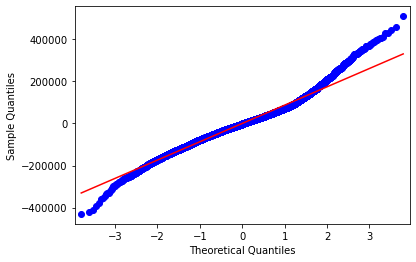

In [167]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds
sm.qqplot(train_residuals, line = 'r');

##### Model 6b

Using columns 'sqft_living', 'bathrooms', 'yr_built' and the columns created from encoding 'bedroom_bin', 'condition', 'view', and 'zipcode'.

In [168]:
cols = ['sqft_living', 'bathrooms', 'yr_built'] + encoded_bedroom_bin + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [169]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8100966710896004
Test Score: 0.8012786541319927


In [170]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.810
Mean Absolute Error: 64684.874
Mean Squared Error: 7716134064.851
Root Mean Squared Error: 87841.528

Testing Metrics:
R2: 0.801
Mean Absolute Error: 64862.014
Mean Squared Error: 7836479607.206
Root Mean Squared Error: 88523.893


#### Model 7

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built' and the columns created from encoding 'condition', 'view', and 'zipcode'. 

In [171]:
cols = ['sqft_living', 'sqft_living15', 'bedrooms', 'bathrooms', 'yr_built'] + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [172]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8177735222058956
Test Score: 0.808232705345419


In [173]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.818
Mean Absolute Error: 63410.643
Mean Squared Error: 7404208977.760
Root Mean Squared Error: 86047.713

Testing Metrics:
R2: 0.808
Mean Absolute Error: 63672.381
Mean Squared Error: 7562249980.371
Root Mean Squared Error: 86961.198


I want to take a look at the interaction between sqft_living and sqft_living15.

lr = LinearRegression()
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

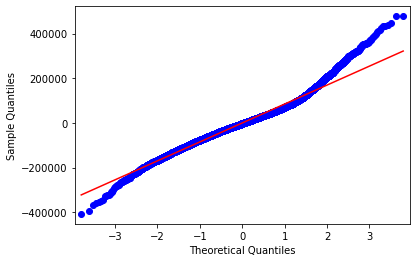

In [174]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds
sm.qqplot(train_residuals, line = 'r');

##### Model 7b

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built' and the columns created from encoding 'bedroom_bin', 'condition', 'view', and 'zipcode'.

In [175]:
cols = ['sqft_living', 'sqft_living15', 'bathrooms', 'yr_built'] + encoded_bedroom_bin + encoded_condition + encoded_view + encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [176]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.8189627188476221
Test Score: 0.8100654824859226


In [177]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.819
Mean Absolute Error: 63086.199
Mean Squared Error: 7355889652.503
Root Mean Squared Error: 85766.483

Testing Metrics:
R2: 0.810
Mean Absolute Error: 63305.427
Mean Squared Error: 7489975305.381
Root Mean Squared Error: 86544.643


lr = LinearRegression()
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()


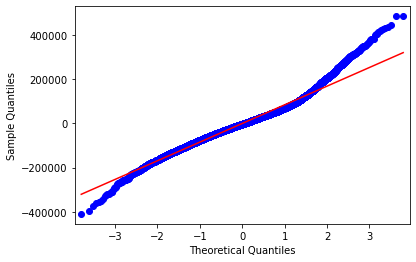

In [178]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds
sm.qqplot(train_residuals, line = 'r');

In [179]:
X_potentials = pd.DataFrame(columns = X_train.columns)
for num in range(0,1):
    X_potentials = X_potentials.append(
    pd.Series(0, index=X_potentials.columns), 
    ignore_index=True)
X_potentials['sqft_living'].replace(0,df['sqft_living'].median(),inplace=True)
X_potentials['sqft_living15'].replace(0,df['sqft_living15'].median(),inplace=True)
X_potentials['bathrooms'].replace(0,df.bathrooms.value_counts().index[0],inplace=True)
X_potentials['yr_built'].replace(0,df.yr_built.value_counts().index[0],inplace=True)

X_potentials['bedrooms_bin_x0_3BR'].replace(0,1,inplace=True)

#condition not needed. By default average

X_potentials['zipcode_x0_98103'].replace(0,1,inplace=True)


X_potentials2 = X_potentials
lr = LinearRegression()
lr.fit(X_train[cols], y_train)
lr.predict(X_potentials[cols])

array([647866.77706854])

In [180]:
lr = LinearRegression()
lr.fit(X_train[cols], y_train)
lr.predict(X_potentials[cols])

array([647866.77706854])

In [181]:
653306.17605558

653306.17605558

#### Model 8

Using columns 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built', 'waterfront' and the columns created from encoding 'bedroom_bin', 'condition', 'view', and 'zipcode'.

In [182]:
# + encoded_view  , 'waterfront'

In [183]:
cols = ['sqft_living', 'sqft_living15','bathrooms', 'yr_built'] + encoded_bedroom_bin + encoded_condition+ encoded_zipcode
y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [184]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_n_score(x,y,x2,y2)

Training Score: 0.807196537717471
Test Score: 0.7988706023988719


In [185]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.807
Mean Absolute Error: 64799.428
Mean Squared Error: 7833972009.208
Root Mean Squared Error: 88509.728

Testing Metrics:
R2: 0.799
Mean Absolute Error: 64826.323
Mean Squared Error: 7931439955.915
Root Mean Squared Error: 89058.632


lr = LinearRegression()
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

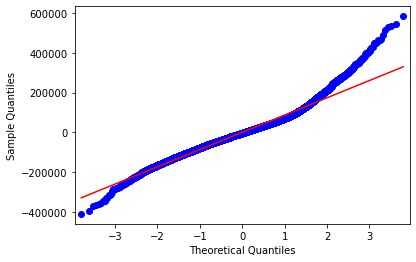

In [186]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds
sm.qqplot(train_residuals, line = 'r');

In [187]:
y = y_train
x = X_train.filter(cols, axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     677.1
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:55:25   Log-Likelihood:            -1.7302e+05
No. Observations:               13507   AIC:                         3.462e+05
Df Residuals:                   13423   BIC:                         3.468e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.801e+05   7.72e+04      6.217      0.000    3.29e+05    6.31e+05
sqft_living              131.2339      2.191     59.888      0.000     126.939     135.529
sqft_living15             67.2887      2.197     30.627      0.000      62.982      71.595
bathrooms               1.363e+04   1862.974      7.316      0.000    9978.755    1.73e+04
yr_built                -308.3527     39.370     -7.832      0.000    -385.524    -231.182
bedrooms_bin_x0_2BR     7203.8730   8221.524      0.876      0.381   -8911.471    2.33e+04
bedrooms_bin_x0_3BR     8138.3522   8153.838      0.998      0.318   -7844.317    2.41e+04
bedrooms_bin_x0_4BR    -3479.5988   8384.950     -0.415      0.678   -1.99e+04     1.3e+04
bedrooms_bin_x0_5BR     -2.83e+04   8950.871     -3.162      0.002   -4.58e+04   -1.08e+04
bedrooms_bin_x0_6BR    -5.662e+04   1.16e+04     -4.898      0.000   -7.93e+04    -3.4e+04
bedrooms_bin_x0_7+BR   -1.253e+05   2.09e+04     -5.982      0.000   -1.66e+05   -8.42e+04
condition_x0_Fair      -3.478e+04   9208.842     -3.777      0.000   -5.28e+04   -1.67e+04
condition_x0_Good       1.332e+04   1978.755      6.734      0.000    9445.391    1.72e+04
condition_x0_Poor      -1.143e+05   2.01e+04     -5.696      0.000   -1.54e+05    -7.5e+04
condition_x0_Very Good  4.288e+04   3102.944     13.821      0.000    3.68e+04     4.9e+04
zipcode_x0_98002        6207.1859   9690.632      0.641      0.522   -1.28e+04    2.52e+04
zipcode_x0_98003        9212.6578   8649.334      1.065      0.287   -7741.253    2.62e+04
zipcode_x0_98004        5.101e+05   1.07e+04     47.824      0.000    4.89e+05    5.31e+05
zipcode_x0_98005        3.502e+05   1.19e+04     29.443      0.000    3.27e+05    3.73e+05
zipcode_x0_98006        2.873e+05   8099.580     35.470      0.000    2.71e+05    3.03e+05
zipcode_x0_98007        2.645e+05   1.06e+04     24.862      0.000    2.44e+05    2.85e+05
zipcode_x0_98008        2.546e+05   8778.342     28.999      0.000    2.37e+05    2.72e+05
zipcode_x0_98010        1.009e+05    1.7e+04      5.928      0.000    6.75e+04    1.34e+05
zipcode_x0_98011        1.396e+05   9827.406     14.204      0.000     1.2e+05    1.59e+05
zipcode_x0_98014        1.248e+05   1.58e+04      7.912      0.000    9.39e+04    1.56e+05
zipcode_x0_98019        7.946e+04   1.03e+04      7.701      0.000    5.92e+04    9.97e+04
zipcode_x0_98022        1.828e+04   1.05e+04      1.745      0.081   -2255.380    3.88e+04
zipcode_x0_98023       -1.298e+04   7534.566     -1.723      0.085   -2.77e+04    1787.737
zipcode_x0_98024        1.421e+05   2.08e+04      6.849      0.000    1.01e+05    1.83e+05
zipcode_x0_98027         2.33e+05   8785.559     26.518      0.000    2.16e+05     2.5e+05
zipcode_x0_98028        1.291e+05   8709.903     14.826      0.000    1.12e+05  

In [188]:
X_potentials = pd.DataFrame(columns = X_train.columns)

In [189]:
for num in range(0,1):
    X_potentials = X_potentials.append(
    pd.Series(0, index=X_potentials.columns), 
    ignore_index=True)

In [190]:
X_potentials['sqft_living'].replace(0,df['sqft_living'].median(),inplace=True)
X_potentials['sqft_living15'].replace(0,df['sqft_living15'].median(),inplace=True)
X_potentials['bathrooms'].replace(0,df.bathrooms.value_counts().index[0],inplace=True)
X_potentials['yr_built'].replace(0,df.yr_built.value_counts().index[0],inplace=True)

X_potentials['bedrooms_bin_x0_3BR'].replace(0,1,inplace=True)

#condition not needed. By default average

X_potentials['zipcode_x0_98103'].replace(0,1,inplace=True)


X_potentials2 = X_potentials

In [191]:
lr = LinearRegression()
lr.fit(X_train[cols], y_train)
lr.predict(X_potentials[cols])

array([591839.61053341])

In [192]:
X_train.filter(cols, axis=1).head(1)

,sqft_living,sqft_living15,bathrooms,yr_built,bedrooms_bin_x0_2BR,bedrooms_bin_x0_3BR,bedrooms_bin_x0_4BR,bedrooms_bin_x0_5BR,bedrooms_bin_x0_6BR,bedrooms_bin_x0_7+BR,...,zipcode_x0_98146,zipcode_x0_98148,zipcode_x0_98155,zipcode_x0_98166,zipcode_x0_98168,zipcode_x0_98177,zipcode_x0_98178,zipcode_x0_98188,zipcode_x0_98198,zipcode_x0_98199
13927,3020,3680,3.5,1978,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
X_potentials[cols].loc[0]

sqft_living              1790
sqft_living15          1747.5
bathrooms                 2.5
yr_built                 2014
bedrooms_bin_x0_2BR         0
                        ...  
zipcode_x0_98177            0
zipcode_x0_98178            0
zipcode_x0_98188            0
zipcode_x0_98198            0
zipcode_x0_98199            0
Name: 0, Length: 83, dtype: object

### Predictions from model 8

In [194]:
#visualizer.predict(X_potentials[cols])

In [195]:
lr = LinearRegression()
lr.fit(X_train[cols], y_train)
lr.predict(X_potentials[cols])

array([591839.61053341])

In [196]:
596617.18627878

596617.18627878

In [197]:
df2 = df.filter(['price', 'grade'])
df2.groupby(['grade']).sum().sort_values(['price'], ascending=False)

,price
grade,
7 Average,3.337213e+09
8 Good,2.748856e+09
9 Better,1.241313e+09
6 Low Average,5.605945e+08
10 Very Good,3.617440e+08
5 Fair,4.762355e+07
11 Excellent,3.862713e+07
4 Low,3.962050e+06


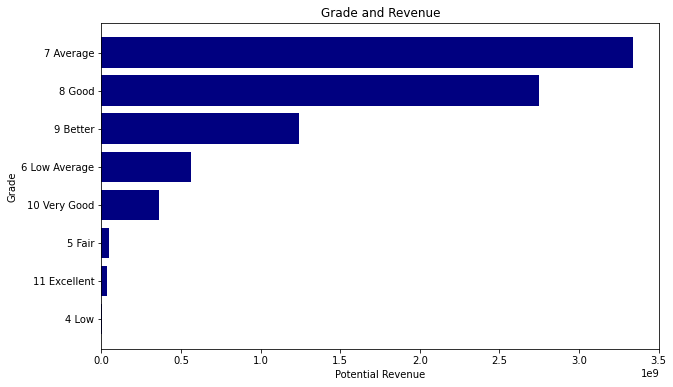

In [198]:
grade_vs_price = df2.groupby(['grade']).sum().sort_values(['price'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

ax.barh(y=grade_vs_price.index, width=grade_vs_price['price'], color="navy")
ax.invert_yaxis()
ax.set_title('Grade and Revenue')
ax.set_ylabel('Grade')
ax.set_xlabel('Potential Revenue');

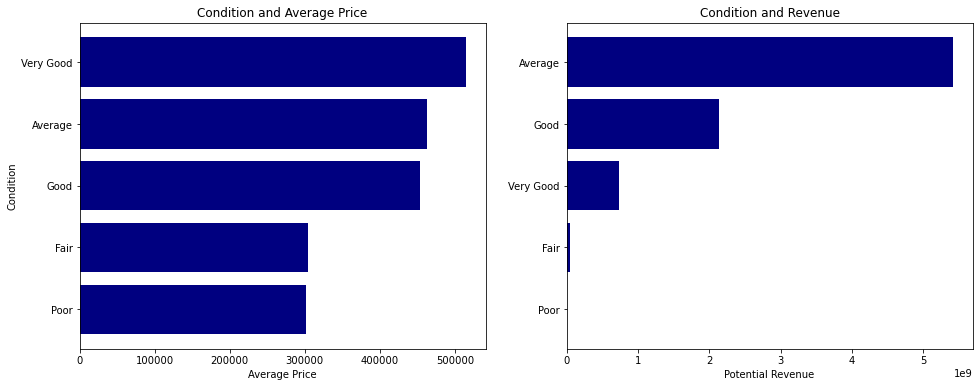

In [199]:
df2 = df.filter(['price', 'condition'])
df2.groupby(['condition']).sum().sort_values(['price'], ascending=False)
grade_vs_price = df2.groupby(['condition']).sum().sort_values(['price'], ascending=False)

fig, (ax2, ax1) = plt.subplots(figsize=(16,6), ncols=2)
ax1.grid(False)
ax2.grid(False)

ax1.barh(y=grade_vs_price.index, width=grade_vs_price['price'], color="navy")
ax1.invert_yaxis()
ax1.set_title('Condition and Revenue')
#ax1.set_ylabel('Grade')
ax1.set_xlabel('Potential Revenue')

grade_vs_price = df2.groupby(['condition']).mean().sort_values(['price'], ascending=False)

ax2.barh(y=grade_vs_price.index, width=grade_vs_price['price'], color="navy")
ax2.invert_yaxis()
ax2.set_title('Condition and Average Price')
ax2.set_ylabel('Condition')
ax2.set_xlabel('Average Price');

In [200]:
df.view.value_counts()

NONE         16710
AVERAGE        655
GOOD           248
FAIR           243
EXCELLENT      100
Name: view, dtype: int64

In [201]:
sum(model.pvalues > .05)

12

In [202]:
sum(model.pvalues > .05) / len(model.pvalues)

0.14285714285714285

In [203]:
sum(model.pvalues > .05)

12

In [204]:
sum(model.pvalues > .05) / len(model.pvalues)

0.14285714285714285

In [205]:
model.params.unique

<bound method Series.unique of const               480072.277628
sqft_living            131.233876
sqft_living15           67.288707
bathrooms            13630.447224
yr_built              -308.352714
                        ...      
zipcode_x0_98177    219934.624253
zipcode_x0_98178     68378.522474
zipcode_x0_98188     36884.789389
zipcode_x0_98198     49473.077106
zipcode_x0_98199    380695.266304
Length: 84, dtype: float64>

In [206]:
(df.bedrooms/df.bathrooms).value_counts()

2.000000    2960
1.600000    2092
1.200000    2016
3.000000    1689
1.714286    1661
            ... 
2.133333       1
1.217391       1
7.000000       1
0.842105       1
1.866667       1
Length: 65, dtype: int64

In [207]:
df.price.value_counts()

350000.0    155
450000.0    149
325000.0    140
425000.0    137
550000.0    135
           ... 
336950.0      1
386100.0      1
176250.0      1
575575.0      1
311300.0      1
Name: price, Length: 3246, dtype: int64

In [208]:
df.view.value_counts()

NONE         16710
AVERAGE        655
GOOD           248
FAIR           243
EXCELLENT      100
Name: view, dtype: int64

In [209]:
df.condition.value_counts()

Average      11727
Good          4703
Very Good     1428
Fair           131
Poor            21
Name: condition, dtype: int64

In [210]:
df.bedrooms.value_counts()

3     8585
4     5396
2     2546
5     1093
6      185
1      171
7       21
8        7
9        3
10       2
11       1
Name: bedrooms, dtype: int64

In [211]:
df.bathrooms.value_counts()

2.50    4526
1.00    3592
1.75    2682
2.00    1739
2.25    1715
1.50    1329
2.75     943
3.00     557
3.50     399
3.25     318
3.75      55
0.75      53
4.00      45
4.50      24
4.25      14
1.25       7
0.50       4
5.00       4
5.25       2
4.75       1
5.75       1
Name: bathrooms, dtype: int64

In [212]:
df.yr_built.value_counts()

2014    495
2005    391
2006    372
2003    369
2004    368
       ... 
2015     28
1902     23
1933     15
1935     15
1934     14
Name: yr_built, Length: 116, dtype: int64

In [213]:
df.price.median()

425000.0

In [214]:
df.price.mean()

463072.3959466963

Recommendations

Next steps